In [ ]:
!pip install rarfile

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import rarfile
import os

path_to_rar = "/content/drive/MyDrive/Programação/DB_IA/Animals.rar"
destination_dir = "/content/"

if os.path.exists(path_to_rar):
    with rarfile.RarFile(path_to_rar, 'r') as rar:
        rar.extractall(destination_dir)
else:
    print("Arquivo RAR não encontrado.")


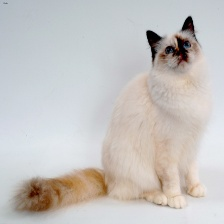

In [ ]:
tf.keras.preprocessing.image.load_img(r'/content/Animals/Birman/Birman_99.jpg')

In [ ]:
data_dir = '/content/Animals'
image_size = (224, 224)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

teste_datagen = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = teste_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 5909 images belonging to 35 classes.
Found 1475 images belonging to 35 classes.


In [ ]:
class_names = train_generator.class_indices
class_names

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British': 4,
 'Egyptian': 5,
 'Maine': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american': 12,
 'basset': 13,
 'beagle': 14,
 'boxer': 15,
 'chihuahua': 16,
 'english': 17,
 'german': 18,
 'great': 19,
 'havanese': 20,
 'japanese': 21,
 'keeshond': 22,
 'leonberger': 23,
 'miniature': 24,
 'newfoundland': 25,
 'pomeranian': 26,
 'pug': 27,
 'saint': 28,
 'samoyed': 29,
 'scottish': 30,
 'shiba': 31,
 'staffordshire': 32,
 'wheaten': 33,
 'yorkshire': 34}

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
IMG_SHAPE = image_size + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_generator))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

In [ ]:
prediction_layer = tf.keras.layers.Dense(35, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
reduce = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    verbose=1,
    mode='auto',
    min_delta=0.000005,
    cooldown=0,
    min_lr=0,
)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    monitor = "val_accuracy",
    patience = 3,
    filepath = "/content/raca.h5",
    verbose = 1,
    save_best_only = True,
    mode = "max"
)

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[reduce, checkpoint])

Epoch 1/10
185/185 [==============================] - ETA: 0s - loss: 1.5026 - accuracy: 0.6822
Epoch 1: val_accuracy improved from -inf to 0.78576, saving model to /content/raca.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


185/185 [==============================] - 478s 3s/step - loss: 1.5026 - accuracy: 0.6822 - val_loss: 1.1271 - val_accuracy: 0.7858 - lr: 1.0000e-04
Epoch 2/10
185/185 [==============================] - ETA: 0s - loss: 1.0257 - accuracy: 0.7763
Epoch 2: val_accuracy improved from 0.78576 to 0.84203, saving model to /content/raca.h5
185/185 [==============================] - 422s 2s/step - loss: 1.0257 - accuracy: 0.7763 - val_loss: 0.8212 - val_accuracy: 0.8420 - lr: 1.0000e-04
Epoch 3/10
185/185 [==============================] - ETA: 0s - loss: 0.7894 - accuracy: 0.8204
Epoch 3: val_accuracy improved from 0.84203 to 0.86576, saving model to /content/raca.h5
185/185 [==============================] - 432s 2s/step - loss: 0.7894 - accuracy: 0.8204 - val_loss: 0.6575 - val_accuracy: 0.8658 - lr: 1.0000e-04
Epoch 4/10
185/185 [==============================] - ETA: 0s - loss: 0.6548 - accuracy: 0.8474
Epoch 4: val_accuracy improved from 0.86576 to 0.87186, saving model to /content/raca.h

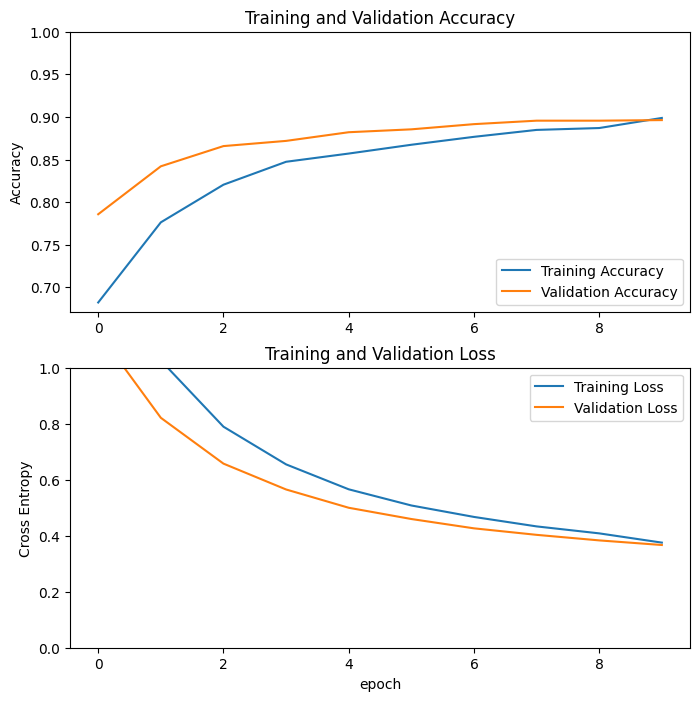

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
tf.keras.models.save_model(model, "/content")
model.save_weights("/content")

In [ ]:
model.save("classificador.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
